This is the group work by Sun Hee Park, Manling Yang

# Introduction
####  Bike Sharing service
Today, there are many ride-sharing companies that offer users to share car rides, or ride electric scooters or bikes. These companies are very popular, and Uber and Lyft are even called "unicorns," which are startup companies valued at over $1 billion. Lime or Birds, the electric scooter-sharing startup companies, are also popular in San Francisco, Chicago and even in Paris. However, bike sharing is the most worthy of notice to be analyzed now and even for the future. It is because people face practical and realistic problems when sharing and cars and electric scooters which do not exist when people share bikes.

For example, with car sharing, people have to get a driver's license. They also have to have car insurance and they have to pay extra costs for gas or tiny scratches that might be occur while driving. Regarding electric scooters, safety is considered to be an issue. In California, Electric Scooter Helmet Laws took effect in 2019. However, it is hard to bring a helmet to ride an electric scooter because people usually take a scooter when they go shorter distances than when they go with a car or a bike.

A bike can solve these problems. People do not have to have a car insurance or a driver's license. A bike is also safer than an electric scooter. According to the Washington Post, two Los Angeles emergency departments, more people were injured while riding standing electric scooters than by riding bicycles or traveling on foot, according to the results of a groundbreaking study.

The Washington Post also showed that the medical journal JAMA Network Open mentioned “The Riders share roads with fast-moving vehicular traffic but appear to underestimate hazards; we found that 94.3% of observed riders in our community were not wearing a helmet,” the study said of scooter users. “While riders of electric scooters in California are required to be at least 16 years old by state law and 18 years old by company rental agreements, we found that 10.8% of electric scooter injuries were in patients younger than 18 years." The study added, Although California law required helmet use while operating electric scooters during the entire study period, only 4.4% of injured scooter riders were documented to be wearing a helmet."

# Research Question:
Along with increasing number of Bike-Sharing users, companies want to analyze their customer's data. They want to conduct marketing based on users who are mostly using the service. We expected that the companies assume main factors as 'time', 'age', and 'gender' for analyzing their data.

In addition, we are also going to compare popularity in using this service in two cities - Chicago and New York. Thus, the questions that we take into account are:

1. When (specific time) do people mostly use bike-sharing service?
2. Which age range of is mostly using bike-sharing service?
3. Which gender is the main users in both city?
4. Which city is more popular to use the bike sharing services?

# Data Analytics Workflow
1. The first data set('Chicago-Divvy-2016') is a CSV from Kaggle. (https://www.kaggle.com/samratp/bikeshare-analysis#Chicago-Divvy-2016.csv)
2. The second data ('NYC2016') is a zip file.

### type one sources: read CSV file

### type two sources: scraped web page via zip

In [148]:
import csv 
import numpy as np
import pandas as pd
import zipfile
import requests
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

In [196]:
df = pd.read_csv(r'C:\Users\13750\Desktop\yu\NYC2016.csv')
df               

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,End Station ID,End Station Name,Bike ID,User Type,Birth Year,Gender,Trip_Duration_in_min
0,362,2016/1/1 0:02,2016/1/1 0:08,3186,Grove St PATH,3209,Brunswick St,24647,Subscriber,1964,2,6
1,200,2016/1/1 0:18,2016/1/1 0:21,3186,Grove St PATH,3213,Van Vorst Park,24605,Subscriber,1962,1,3
2,202,2016/1/1 0:18,2016/1/1 0:21,3186,Grove St PATH,3213,Van Vorst Park,24689,Subscriber,1962,2,3
3,248,2016/1/1 0:23,2016/1/1 0:27,3209,Brunswick St,3203,Hamilton Park,24693,Subscriber,1984,1,4
4,903,2016/1/1 1:03,2016/1/1 1:18,3195,Sip Ave,3210,Pershing Field,24573,Customer,1984,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...
494597,288,2016/12/30 22:15,2016/12/30 22:20,3186,Grove St PATH,3205,JC Medical Center,24409,Subscriber,1989,2,5
494598,533,2016/12/30 22:33,2016/12/30 22:41,3195,Sip Ave,3207,Oakland Ave,24486,Subscriber,1993,2,9
494599,71,2016/12/30 22:42,2016/12/30 22:43,3186,Grove St PATH,3185,City Hall,24513,Subscriber,1957,1,1
494600,233,2016/12/30 23:19,2016/12/30 23:23,3186,Grove St PATH,3209,Brunswick St,26281,Subscriber,1976,1,4


### Clean up the dataset

In [197]:
# extract the meaningful column for the analysis
df = df.iloc[:, [1, 4, 6, 8, 9, 10, 11]]
df.head()

,Start Time,Start Station Name,End Station Name,User Type,Birth Year,Gender,Trip_Duration_in_min
0,2016/1/1 0:02,Grove St PATH,Brunswick St,Subscriber,1964,2,6
1,2016/1/1 0:18,Grove St PATH,Van Vorst Park,Subscriber,1962,1,3
2,2016/1/1 0:18,Grove St PATH,Van Vorst Park,Subscriber,1962,2,3
3,2016/1/1 0:23,Brunswick St,Hamilton Park,Subscriber,1984,1,4
4,2016/1/1 1:03,Sip Ave,Pershing Field,Customer,1984,0,15


In [198]:
# use info function to get the basic information of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494602 entries, 0 to 494601
Data columns (total 7 columns):
Start Time              494602 non-null object
Start Station Name      494602 non-null object
End Station Name        494602 non-null object
User Type               494602 non-null object
Birth Year              494602 non-null int64
Gender                  494602 non-null int64
Trip_Duration_in_min    494602 non-null int64
dtypes: int64(3), object(4)
memory usage: 26.4+ MB


There are 494602 rows of the dataset, which means that in 2016 NYC, the numbers of bike-sharing using is 494602 times. 

In [199]:
# clean up the dataset
# usse datetime function to make column star time to be datetime format
df['Start Time'] = pd.to_datetime(df['Start Time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494602 entries, 0 to 494601
Data columns (total 7 columns):
Start Time              494602 non-null datetime64[ns]
Start Station Name      494602 non-null object
End Station Name        494602 non-null object
User Type               494602 non-null object
Birth Year              494602 non-null int64
Gender                  494602 non-null int64
Trip_Duration_in_min    494602 non-null int64
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 26.4+ MB


C:\Users\13750\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [200]:
# add the column weekday of the dataset
# print the result with head
df['Weekday'] = df['Start Time'].dt.weekday_name.astype(str)
df.head()

C:\Users\13750\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Start Time,Start Station Name,End Station Name,User Type,Birth Year,Gender,Trip_Duration_in_min,Weekday
0,2016-01-01 00:02:00,Grove St PATH,Brunswick St,Subscriber,1964,2,6,Friday
1,2016-01-01 00:18:00,Grove St PATH,Van Vorst Park,Subscriber,1962,1,3,Friday
2,2016-01-01 00:18:00,Grove St PATH,Van Vorst Park,Subscriber,1962,2,3,Friday
3,2016-01-01 00:23:00,Brunswick St,Hamilton Park,Subscriber,1984,1,4,Friday
4,2016-01-01 01:03:00,Sip Ave,Pershing Field,Customer,1984,0,15,Friday


In [201]:
# add the column month of the dataset
# print the result with head
df['Month'] = df['Start Time'].dt.month.astype(str)
df.head()

C:\Users\13750\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Start Time,Start Station Name,End Station Name,User Type,Birth Year,Gender,Trip_Duration_in_min,Weekday,Month
0,2016-01-01 00:02:00,Grove St PATH,Brunswick St,Subscriber,1964,2,6,Friday,1
1,2016-01-01 00:18:00,Grove St PATH,Van Vorst Park,Subscriber,1962,1,3,Friday,1
2,2016-01-01 00:18:00,Grove St PATH,Van Vorst Park,Subscriber,1962,2,3,Friday,1
3,2016-01-01 00:23:00,Brunswick St,Hamilton Park,Subscriber,1984,1,4,Friday,1
4,2016-01-01 01:03:00,Sip Ave,Pershing Field,Customer,1984,0,15,Friday,1


In [203]:
# add the column month of the dataset
# print the result with head
df['Day'] = df['Start Time'].dt.day.astype(str)
df.head()

C:\Users\13750\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Start Time,Start Station Name,End Station Name,User Type,Birth Year,Gender,Trip_Duration_in_min,Weekday,Month,Day
0,2016-01-01 00:02:00,Grove St PATH,Brunswick St,Subscriber,1964,2,6,Friday,1,1
1,2016-01-01 00:18:00,Grove St PATH,Van Vorst Park,Subscriber,1962,1,3,Friday,1,1
2,2016-01-01 00:18:00,Grove St PATH,Van Vorst Park,Subscriber,1962,2,3,Friday,1,1
3,2016-01-01 00:23:00,Brunswick St,Hamilton Park,Subscriber,1984,1,4,Friday,1,1
4,2016-01-01 01:03:00,Sip Ave,Pershing Field,Customer,1984,0,15,Friday,1,1


Because the dataset has the trip duration in min column, after I clean up the start time column, I drop it. 

In [204]:
# use drop function to drop start time column
df = df.drop(columns = ['Start Time'])
df.head()

,Start Station Name,End Station Name,User Type,Birth Year,Gender,Trip_Duration_in_min,Weekday,Month,Day
0,Grove St PATH,Brunswick St,Subscriber,1964,2,6,Friday,1,1
1,Grove St PATH,Van Vorst Park,Subscriber,1962,1,3,Friday,1,1
2,Grove St PATH,Van Vorst Park,Subscriber,1962,2,3,Friday,1,1
3,Brunswick St,Hamilton Park,Subscriber,1984,1,4,Friday,1,1
4,Sip Ave,Pershing Field,Customer,1984,0,15,Friday,1,1


In [205]:
# make 2 = male, 1 = female and 0 = unknow
# print the result with head
df1 = df.replace({'Gender':{2 :'Male', 1 :'Female', 0: 'Unknow'}})
df1.head()

,Start Station Name,End Station Name,User Type,Birth Year,Gender,Trip_Duration_in_min,Weekday,Month,Day
0,Grove St PATH,Brunswick St,Subscriber,1964,Male,6,Friday,1,1
1,Grove St PATH,Van Vorst Park,Subscriber,1962,Female,3,Friday,1,1
2,Grove St PATH,Van Vorst Park,Subscriber,1962,Male,3,Friday,1,1
3,Brunswick St,Hamilton Park,Subscriber,1984,Female,4,Friday,1,1
4,Sip Ave,Pershing Field,Customer,1984,Unknow,15,Friday,1,1


### Analysis each attributes of the dataset

#### Analysis of  Start Station Name

In [158]:
df1['Start Station Name'].describe()

count            494602
unique               51
top       Grove St PATH
freq              57432
Name: Start Station Name, dtype: object

There are 51 bike-sharing station in 2016 NYC. And the most popular station is Grove St PATH. 

In [159]:
start = df1.groupby('Start Station Name').count()
print(start)

                         End Station Name  User Type  Birth Year  Gender  \
Start Station Name                                                         
5 Corners Library                    5454       5454        5454    5454   
Astor Place                           354        354         354     354   
Baldwin at Montgomery                9050       9050        9050    9050   
Bayside Park                          690        690         690     690   
Bethune Center                         58         58          58      58   
Brunswick & 6th                      1702       1702        1702    1702   
Brunswick St                        19134      19134       19134   19134   
Central Ave                          4466       4466        4466    4466   
Christ Hospital                      4730       4730        4730    4730   
City Hall                           15552      15552       15552   15552   
Columbia Park                         384        384         384     384   
Columbus Dri

In [160]:
# use sort_value function to ascending number of counts
start = start.sort_values(by=['Start Station Name', 'End Station Name'])
start.sort_values(by='End Station Name', ascending=True)

,End Station Name,User Type,Birth Year,Gender,Trip_Duration_in_min,Weekday,Month,Day
Start Station Name,,,,,,,,
JCBS Depot,2,2,2,2,2,2,2,2
Bethune Center,58,58,58,58,58,58,58,58
Communipaw & Berry Lane,66,66,66,66,66,66,66,66
Danforth Light Rail,120,120,120,120,120,120,120,120
Astor Place,354,354,354,354,354,354,354,354
Columbia Park,384,384,384,384,384,384,384,384
West Side Light Rail,478,478,478,478,478,478,478,478
MLK Light Rail,486,486,486,486,486,486,486,486
Bayside Park,690,690,690,690,690,690,690,690


The JCBS Depot bike-sharing's station has the least users in 2016 NYC.

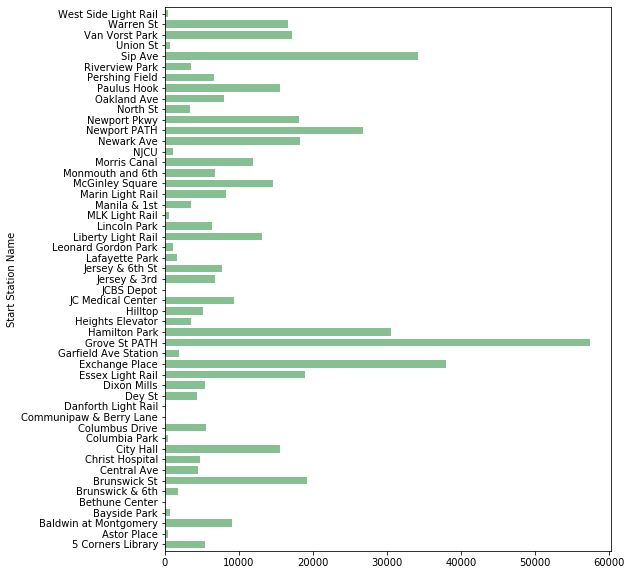

In [161]:
startp = start['End Station Name'].plot(kind='barh', figsize=(8, 10), color='#86bf91', zorder=2, width=0.7)

Grove St PATH,Exchange Place,Sip Ave, and Hamilton Park are the popular station which have more than 30000 times usage.And just JCBS Depot
has less than 10 times usage in 2016 NYC.

#### Analysis of  End Station Name

In [162]:
df1['End Station Name'].describe()

count            494602
unique              102
top       Grove St PATH
freq              76528
Name: End Station Name, dtype: object

In [163]:
end = df1.groupby('End Station Name').count()
print(end)

                         Start Station Name  User Type  Birth Year  Gender  \
End Station Name                                                             
12 Ave & W 40 St                         10         10          10      10   
5 Corners Library                      4490       4490        4490    4490   
6 Ave & Broome St                         2          2           2       2   
6 Ave & W 33 St                           2          2           2       2   
Allen St & Rivington St                   2          2           2       2   
...                                     ...        ...         ...     ...   
West Side Light Rail                    744        744         744     744   
West St & Chambers St                     2          2           2       2   
West Thames St                            4          4           4       4   
William St & Pine St                      2          2           2       2   
York St & Jay St                          2          2          

There are 102 station that bike-sharing users make it as end position.

In [164]:
# use sort_value function to ascending number of counts
end = end.sort_values(by=['End Station Name', 'Start Station Name'])
end.sort_values(by='Start Station Name', ascending=True)

,Start Station Name,User Type,Birth Year,Gender,Trip_Duration_in_min,Weekday,Month,Day
End Station Name,,,,,,,,
York St & Jay St,2,2,2,2,2,2,2,2
William St & Pine St,2,2,2,2,2,2,2,2
Roebling St & N 4 St,2,2,2,2,2,2,2,2
Riverside Dr & W 82 St,2,2,2,2,2,2,2,2
Riverside Dr & W 78 St,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...
Newport PATH,27046,27046,27046,27046,27046,27046,27046,27046
Hamilton Park,30816,30816,30816,30816,30816,30816,30816,30816
Sip Ave,31748,31748,31748,31748,31748,31748,31748,31748


Most of bike-sharing users would like to go to the Grove St PATH. 

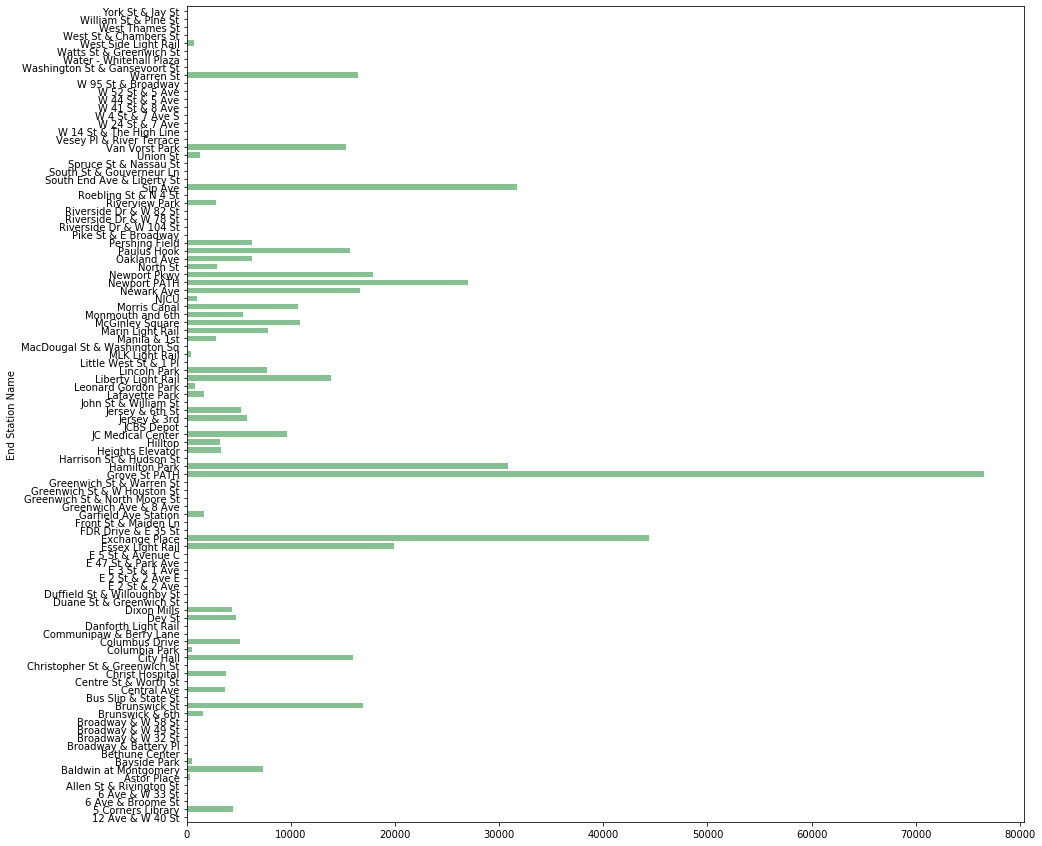

In [165]:
endp = end['Start Station Name'].plot(kind='barh', figsize=(15, 15), color='#86bf91', zorder=2, width=0.7)

There are total 102 statio that bike-sharing users have been gone. And the most popular one is Grove St PATH. There are five stations are hot(more than 30000 times usage in 2016 NYC),inclusing Hamilton Park, Sip Ave,Exchange Place, and Grove St PATH. There are many station with lower numbers.

#### Analysis of user type

In [166]:
df1['User Type'].describe()

count         494602
unique             2
top       Subscriber
freq          463576
Name: User Type, dtype: object

In [167]:
user = df1.groupby('User Type').count()
user

,Start Station Name,End Station Name,Birth Year,Gender,Trip_Duration_in_min,Weekday,Month,Day
User Type,,,,,,,,
Customer,31026,31026,31026,31026,31026,31026,31026,31026
Subscriber,463576,463576,463576,463576,463576,463576,463576,463576


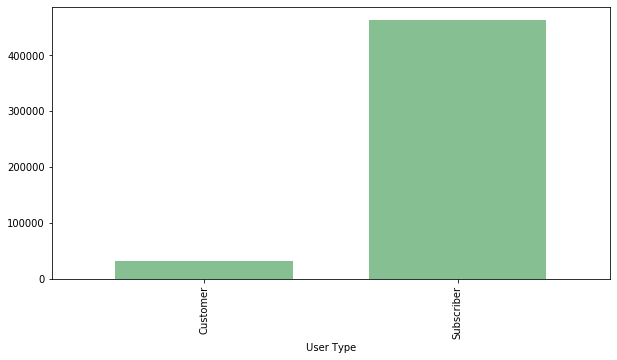

In [168]:
userp= user['Start Station Name'].plot(kind='bar', figsize=(10, 5), color='#86bf91', zorder=2, width=0.7)

There are most of user type is subscriber.

#### Analysis of Birth Year

In [169]:
df1['Birth Year'].describe()

count    494602.000000
mean       1979.694255
std           9.302147
min        1900.000000
25%        1975.000000
50%        1982.000000
75%        1986.000000
max        2000.000000
Name: Birth Year, dtype: float64

In 2016, the max birth year of bike-sharing users is 1900 and the min is 2000.

In [170]:
birth = df1.groupby('Birth Year').count()
birth.head()

,Start Station Name,End Station Name,User Type,Gender,Trip_Duration_in_min,Weekday,Month,Day
Birth Year,,,,,,,,
1900,2,2,2,2,2,2,2,2
1934,2,2,2,2,2,2,2,2
1937,8,8,8,8,8,8,8,8
1940,6,6,6,6,6,6,6,6
1941,200,200,200,200,200,200,200,200


In [171]:
# use sort_value function to ascending number of counts
birth = birth.sort_values(by=['Birth Year', 'Start Station Name'])
birth.sort_values(by='Start Station Name', ascending=True)

,Start Station Name,End Station Name,User Type,Gender,Trip_Duration_in_min,Weekday,Month,Day
Birth Year,,,,,,,,
1900,2,2,2,2,2,2,2,2
1934,2,2,2,2,2,2,2,2
1940,6,6,6,6,6,6,6,6
1937,8,8,8,8,8,8,8,8
1943,12,12,12,12,12,12,12,12
...,...,...,...,...,...,...,...,...
1985,21570,21570,21570,21570,21570,21570,21570,21570
1983,22416,22416,22416,22416,22416,22416,22416,22416
1981,24528,24528,24528,24528,24528,24528,24528,24528


There are 64 different years of bike-sharing users in 2016 NYC.

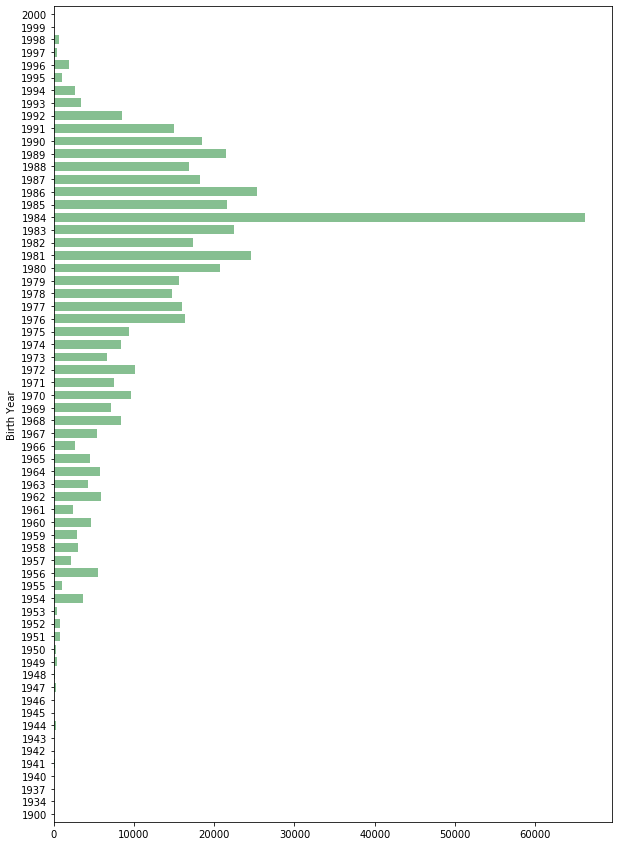

In [172]:
birthp = birth['Start Station Name'].plot(kind='barh', figsize=(10, 15), color='#86bf91', zorder=2, width=0.7)

According to the charts, we can know the main users' birth year concentrate on 1992 - 1975.

#### Analysis of gender

In [173]:
df1['Gender'].describe()

count     494602
unique         3
top       Female
freq      353976
Name: Gender, dtype: object

Female is main users of 2016 NYC bike-sharing.

In [174]:
gender = df1.groupby('Gender').count()
gender.head()

,Start Station Name,End Station Name,User Type,Birth Year,Trip_Duration_in_min,Weekday,Month,Day
Gender,,,,,,,,
Female,353976,353976,353976,353976,353976,353976,353976,353976
Male,100850,100850,100850,100850,100850,100850,100850,100850
Unknow,39776,39776,39776,39776,39776,39776,39776,39776


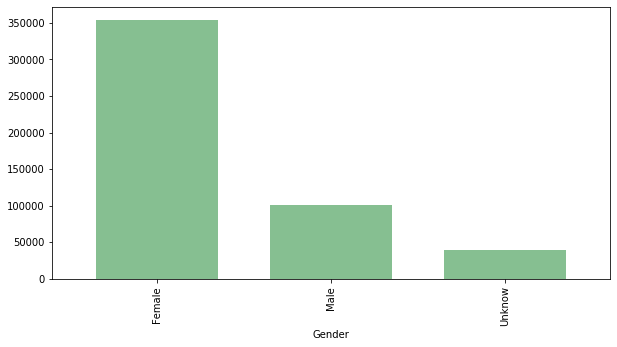

In [176]:
genderp = gender['Start Station Name'].plot(kind='bar', figsize=(10, 5), color='#86bf91', zorder=2, width=0.7)

Female is at least twice of male in 2016 NYC.

#### Analysis of Trip_Duration_in_min

In [181]:
d = df1['Trip_Duration_in_min'].describe()
d

count    494602.000000
mean         14.752472
std         599.290328
min           1.000000
25%           4.000000
50%           6.000000
75%          11.000000
max      272163.000000
Name: Trip_Duration_in_min, dtype: float64

The average min of bike-sharing usage is 15 in 2016 NYC.

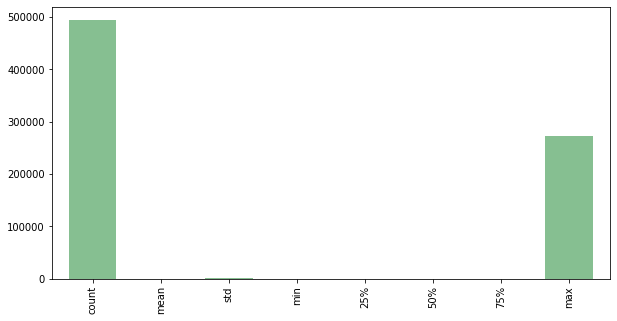

In [182]:
durationp = d.plot(kind='bar', figsize=(10, 5), color='#86bf91', zorder=2, width=0.7)

#### Analysis of Weekday

In [184]:
df1['Weekday'].describe()

count        494602
unique            7
top       Wednesday
freq          81108
Name: Weekday, dtype: object

 Wednesday is the weekday that most people would like to use the bike-sharing in 2016 NYC.

In [185]:
week = df1.groupby('Weekday').count()
print(week)

           Start Station Name  End Station Name  User Type  Birth Year  \
Weekday                                                                  
Friday                  74538             74538      74538       74538   
Monday                  72698             72698      72698       72698   
Saturday                55388             55388      55388       55388   
Sunday                  54152             54152      54152       54152   
Thursday                79130             79130      79130       79130   
Tuesday                 77588             77588      77588       77588   
Wednesday               81108             81108      81108       81108   

           Gender  Trip_Duration_in_min  Month    Day    Age  
Weekday                                                       
Friday      74538                 74538  74538  74538  74538  
Monday      72698                 72698  72698  72698  72698  
Saturday    55388                 55388  55388  55388  55388  
Sunday      54152 

In [186]:
# use sort_value function to ascending number of counts
week = week.sort_values(by=['Weekday', 'Start Station Name'])
week.sort_values(by='Start Station Name', ascending=True)

,Start Station Name,End Station Name,User Type,Birth Year,Gender,Trip_Duration_in_min,Month,Day,Age
Weekday,,,,,,,,,
Sunday,54152,54152,54152,54152,54152,54152,54152,54152,54152
Saturday,55388,55388,55388,55388,55388,55388,55388,55388,55388
Monday,72698,72698,72698,72698,72698,72698,72698,72698,72698
Friday,74538,74538,74538,74538,74538,74538,74538,74538,74538
Tuesday,77588,77588,77588,77588,77588,77588,77588,77588,77588
Thursday,79130,79130,79130,79130,79130,79130,79130,79130,79130
Wednesday,81108,81108,81108,81108,81108,81108,81108,81108,81108


Sunday is the weekday that least people would like to use the bike-sharing in 2016 NYC.

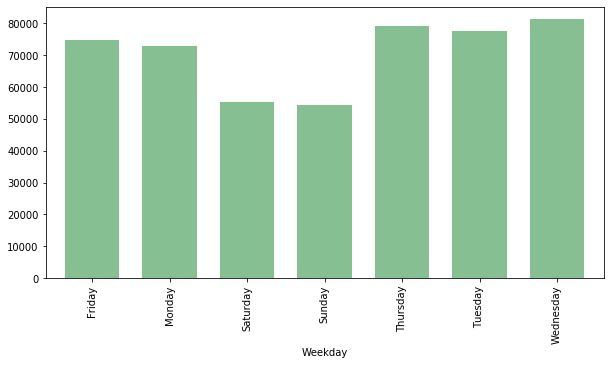

In [191]:
weekp = week['Start Station Name'].plot(kind='bar', figsize=(10, 5), color='#86bf91', zorder=2, width=0.7)

Sunday and Saturday is less users and other weekday will be more users. 

#### Analysis of Month

In [206]:
df1['Month'].describe()

count     494602
unique        12
top            8
freq       68298
Name: Month, dtype: object

The August is the month that has the most users in 2016 NYC.

In [207]:
mon = df1.groupby('Month').count()
print(mon)

       Start Station Name  End Station Name  User Type  Birth Year  Gender  \
Month                                                                        
1                   14958             14958      14958       14958   14958   
10                  59222             59222      59222       59222   59222   
11                  43664             43664      43664       43664   43664   
12                  29662             29662      29662       29662   29662   
2                   16500             16500      16500       16500   16500   
3                   27022             27022      27022       27022   27022   
4                   32684             32684      32684       32684   32684   
5                   38976             38976      38976       38976   38976   
6                   47894             47894      47894       47894   47894   
7                   48872             48872      48872       48872   48872   
8                   68298             68298      68298       682

In [213]:
# use sort_value function to ascending number of counts
mon = mon.sort_values(by=['Month', 'Start Station Name'])
mon.sort_values(by='Start Station Name',ascending=True)

,Start Station Name,End Station Name,User Type,Birth Year,Gender,Trip_Duration_in_min,Weekday,Day
Month,,,,,,,,
1,14958,14958,14958,14958,14958,14958,14958,14958
2,16500,16500,16500,16500,16500,16500,16500,16500
3,27022,27022,27022,27022,27022,27022,27022,27022
12,29662,29662,29662,29662,29662,29662,29662,29662
4,32684,32684,32684,32684,32684,32684,32684,32684
5,38976,38976,38976,38976,38976,38976,38976,38976
11,43664,43664,43664,43664,43664,43664,43664,43664
6,47894,47894,47894,47894,47894,47894,47894,47894
7,48872,48872,48872,48872,48872,48872,48872,48872


The Janurary is the month that the lest people use bike-sharing. And the August is the most.

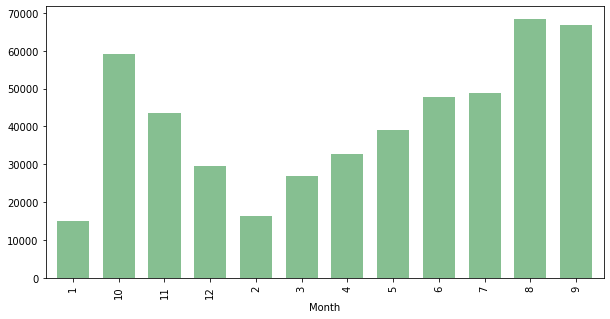

In [214]:
monp= mon['Start Station Name'].plot(kind='bar', figsize=(10, 5), color='#86bf91', zorder=2, width=0.7)

#### Analysis of Day

In [222]:
df1['Day'].describe()

count     494602
unique        31
top            7
freq       17678
Name: Day, dtype: object

In [221]:
day = df1.groupby('Day').count()
day

,Start Station Name,End Station Name,User Type,Birth Year,Gender,Trip_Duration_in_min,Weekday,Month
Day,,,,,,,,
1,15390,15390,15390,15390,15390,15390,15390,15390
10,16144,16144,16144,16144,16144,16144,16144,16144
11,16142,16142,16142,16142,16142,16142,16142,16142
12,17328,17328,17328,17328,17328,17328,17328,17328
13,16624,16624,16624,16624,16624,16624,16624,16624
14,16820,16820,16820,16820,16820,16820,16820,16820
15,16466,16466,16466,16466,16466,16466,16466,16466
16,16648,16648,16648,16648,16648,16648,16648,16648
17,17454,17454,17454,17454,17454,17454,17454,17454


In [223]:
# use sort_value function to ascending number of counts
day = day.sort_values(by=['Day', 'Start Station Name'])
day.sort_values(by='Start Station Name',ascending=True)

,Start Station Name,End Station Name,User Type,Birth Year,Gender,Trip_Duration_in_min,Weekday,Month
Day,,,,,,,,
31,8862,8862,8862,8862,8862,8862,8862,8862
30,13114,13114,13114,13114,13114,13114,13114,13114
3,14836,14836,14836,14836,14836,14836,14836,14836
24,14868,14868,14868,14868,14868,14868,14868,14868
29,15046,15046,15046,15046,15046,15046,15046,15046
1,15390,15390,15390,15390,15390,15390,15390,15390
5,15624,15624,15624,15624,15624,15624,15624,15624
25,15640,15640,15640,15640,15640,15640,15640,15640
9,15702,15702,15702,15702,15702,15702,15702,15702


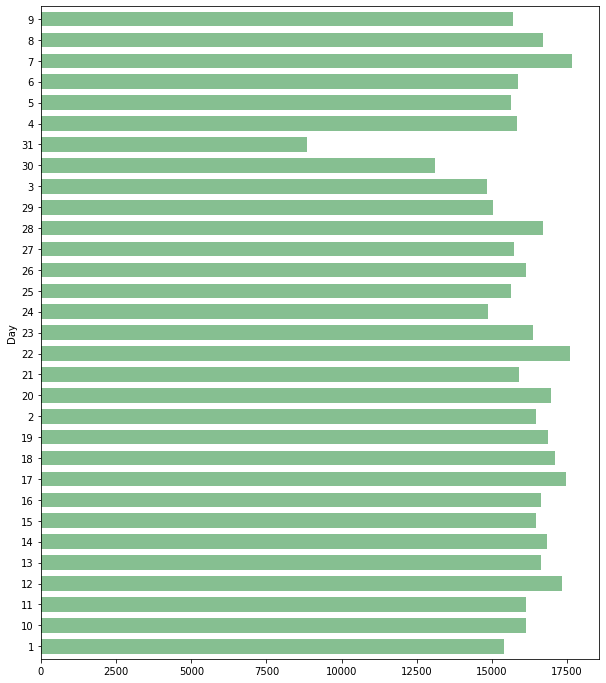

In [218]:
dayp= day['Start Station Name'].plot(kind='barh', figsize=(10, 12), color='#86bf91', zorder=2, width=0.7)

The 31st and 30th are the day that less people want to use bike

## Research question

In [ ]:
# add age column to the dataframe df, the current year is 2016,so the age = current year - birth year
df1['Age'] = 2016 - df['Birth Year']
df

In [27]:
# use describe function to get statistical summary to know the age of bick-sharing users' max and min. 
df['Age'].describe()

count    494602.000000
mean         36.305745
std           9.302147
min          16.000000
25%          30.000000
50%          34.000000
75%          41.000000
max         116.000000
Name: Age, dtype: float64

According to the table, the max age of bike-sharing users is 116 and the min is 16.

In [ ]:
# use scatter pot to see the bike-sharing users' age by seaborn function
sns.swarmplot(x = df['Age'])

In [ ]:
# add age column to the dataframe df, the current year is 2016,so the age = current year - birth year
df1['Age'] = 2016 - df['Birth Year']
df1

In [19]:
import requests
req = requests.request('GET', 'https://www.kaggle.com/akkithetechie/new-york-city-bike-share-dataset#NYC-BikeShare-2015-2017-combined.csv')
re1

#https://www.kaggle.com/shrishtiwahal/data-cleaning-challenge-parsing-dates

NameError: name 're1' is not defined